In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


Librerias

In [19]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Cargar una imagen en modo BGR
img = cv2.imread('/content/i4.png')


Imagen Original

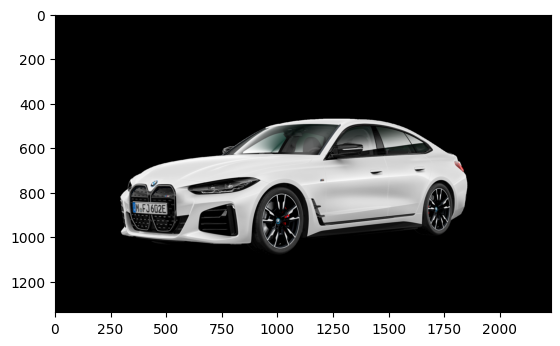

In [24]:
# Convertir BGR a RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Mostrar la imagen usando matplotlib
plt.imshow(img_rgb)
plt.show()

(array([255.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([      0.     ,  235971.09375,  471942.1875 ,  707913.25   ,
         943884.375  , 1179855.5    , 1415826.5    , 1651797.625  ,
        1887768.75   , 2123739.75   , 2359711.     ]),
 <BarContainer object of 10 artists>)

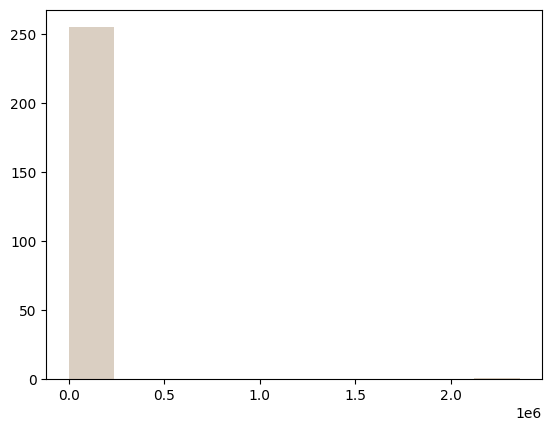

In [25]:
# Convertir a escala de grises
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
hist_gray = cv2.calcHist([gray], [0], None, [256], [0, 256])

# Aplicar desenfoque Gaussiano
blurred = cv2.GaussianBlur(gray, (11, 11), 0)
hist_blurred = cv2.calcHist([gray], [0], None, [256], [0, 256])

plt.show()
plt.hist(hist_gray, alpha = 0.2)
plt.hist(hist_blurred, alpha = 0.2)

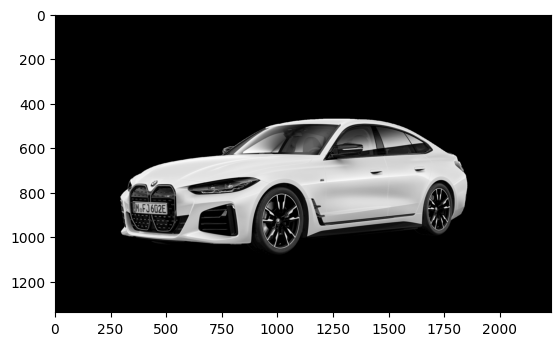

In [26]:
# Mostrar la imagen usando matplotlib
plt.imshow(gray, cmap='gray')
plt.show()

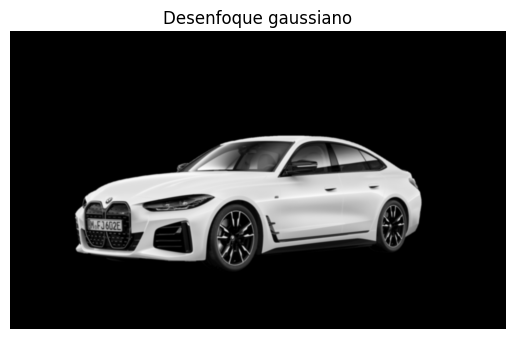

In [27]:
plt.imshow(blurred, cmap='gray')
plt.title('Desenfoque gaussiano')
plt.axis('off')
plt.show()

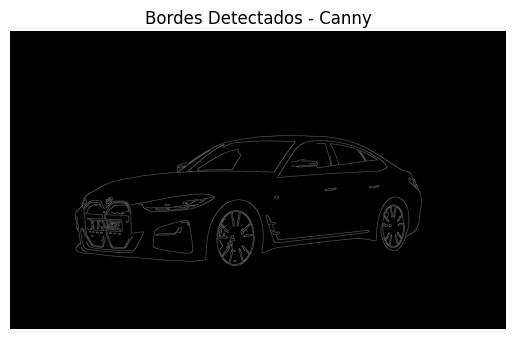

In [28]:
# Detectar bordes usando el detector de Canny
edges = cv2.Canny(blurred, 30, 150)

plt.imshow(edges, cmap='gray')
plt.title('Bordes Detectados - Canny')
plt.axis('off')
plt.show()

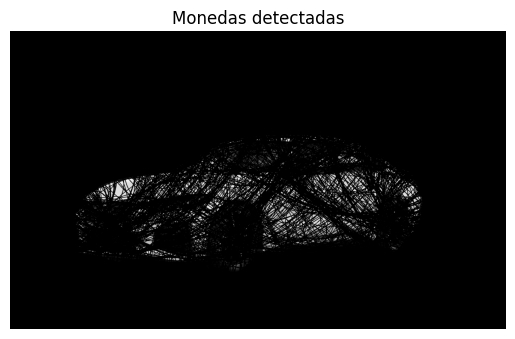

In [29]:
img_circles = blurred.copy()
circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=1.5, minDist=50,
                           param1=10, param2=5, minRadius=0, maxRadius=0)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(img_circles,(i[0],i[1]),i[2],(0,255,0),2)

